In [1]:
import numpy as np
import matplotlib.pyplot as plt

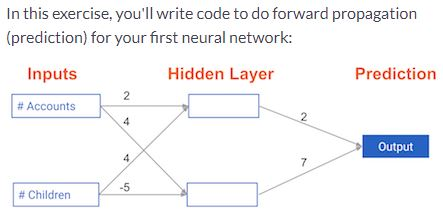

In [2]:
from IPython.display import Image
Image(filename='E:/pg/docs/BPB/Deep Learning/Images/fp_1.JPG')

Each data point is a customer. The first input is how many accounts they have, and the second input is how many children they have. The model will predict how many transactions the user makes in the next year.

In [3]:
# array holding the customers data with 3 Accounts and 5 Childern
input_data = np.array([3,5])

In [4]:
weights = {'node_0': np.array([2, 4]), 'node_1': np.array([ 4, -5]), 'output': np.array([2, 7])}
weights['output'] = np.array([2, 7])

In [5]:
# Calculate node 0 value: node_0_value
node_0_value = (input_data * weights['node_0']).sum()

# Calculate node 1 value: node_1_value
node_1_value = (input_data * weights['node_1']).sum()

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_value, node_1_value])

# Calculate output: output
output = (hidden_layer_outputs * weights['output']).sum()

# Print output
print(output)

-39


an "activation function" is a function applied at each node. It converts the node's input into some output.

The rectified linear activation function (called ReLU) has been shown to lead to very high-performance networks. This function takes a single number as an input, returning 0 if the input is negative, and the input if the input is positive.

Here are some examples:
relu(3) = 3 
relu(-3) = 0 

In [6]:
def relu(input):
    '''Define your relu activation function here'''
    # Calculate the value for the output of the relu function: output
    output = max(0, input)
    
    # Return the value just calculated
    return(output)

# Calculate node 0 value: node_0_output
node_0_input = (input_data * weights['node_0']).sum()
node_0_output = relu(node_0_input)

# Calculate node 1 value: node_1_output
node_1_input = (input_data * weights['node_1']).sum()
node_1_output = relu(node_1_input)

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_output, node_1_output])

# Calculate model output (do not apply relu)
model_output = (hidden_layer_outputs * weights['output']).sum()

# Print model output
print(model_output)

52


Great work! You predicted 52 transactions. Without this activation function, you would have predicted a negative number! The real power of activation functions will come soon when you start tuning model weights.

define a function called predict_with_network() which will generate predictions for multiple data observations.

In [7]:
input_data = [np.array([3, 5]), np.array([ 1, -1]), np.array([0, 0]), np.array([8, 4])]

weights = {'node_0': np.array([2, 4]), 'node_1': np.array([ 4, -5]), 'output': np.array([2, 7])}

# Define predict_with_network()
def predict_with_network(input_data_row, weights):

    # Calculate node 0 value
    node_0_input = (input_data_row * weights['node_0']).sum()
    node_0_output = relu(node_0_input)

    # Calculate node 1 value
    node_1_input = (input_data_row * weights['node_1']).sum()
    node_1_output = relu(node_1_input)

    # Put node values into array: hidden_layer_outputs
    hidden_layer_outputs = np.array([node_0_output, node_1_output])
    
    # Calculate model output
    input_to_final_layer = (hidden_layer_outputs * weights['output']).sum()
    model_output = relu(input_to_final_layer)
    
    # Return model output
    return(model_output)


# Create empty list to store prediction results
results = []
for input_data_row in input_data:
    # Append prediction to results
    results.append(predict_with_network(input_data_row, weights))

# Print results
print(results)
        

[52, 63, 0, 148]


Multi-layer neural networks
In this exercise, you'll write code to do forward propagation for a neural network with 2 hidden layers. Each hidden layer has two nodes.

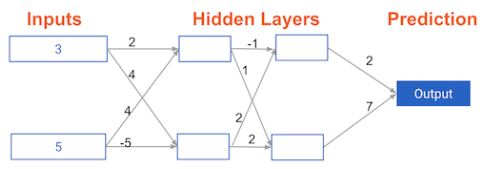

In [8]:
Image(filename='E:/pg/docs/BPB/Deep Learning/Images/fp_2.JPG')

In [9]:
input_data = np.array([3, 5])
weights = {'node_0_0': np.array([2, 4]),
           'node_0_1': np.array([ 4, -5]),
           'node_1_0': np.array([-1,  2]),
           'node_1_1': np.array([1, 2]),
           'output': np.array([2, 7])}

def predict_with_network(input_data):
    # Calculate node 0 in the first hidden layer
    node_0_0_input = (input_data * weights['node_0_0']).sum()
    node_0_0_output = relu(node_0_0_input)

    # Calculate node 1 in the first hidden layer
    node_0_1_input = (input_data * weights['node_0_1']).sum()
    node_0_1_output = relu(node_0_1_input)

    # Put node values into array: hidden_0_outputs
    hidden_0_outputs = np.array([node_0_0_output, node_0_1_output])

    # Calculate node 0 in the second hidden layer
    node_1_0_input = (hidden_0_outputs * weights['node_1_0']).sum()
    node_1_0_output = relu(node_1_0_input)

    # Calculate node 1 in the second hidden layer
    node_1_1_input = (hidden_0_outputs * weights['node_1_1']).sum()
    node_1_1_output = relu(node_1_1_input)

    # Put node values into array: hidden_1_outputs
    hidden_1_outputs = np.array([node_1_0_output, node_1_1_output])
    
    # Calculate output here: model_output
    model_output = (hidden_1_outputs * weights['output']).sum()
    
    # Return model_output
    return(model_output)

output = predict_with_network(input_data)
print(output)

182


1. How are the weights that determine the features/interactions in Neural Networks created?
The model training process sets them to optimize predictive accuracy.
2. Which layers of a model capture more complex or "higher level" interactions?
The last layers capture the most complex interactions.

Calculating model errors-

What is the error (predicted - actual) for the following network when the input data is [3, 2] and the actual value of the target (what you are trying to predict) is 5? 

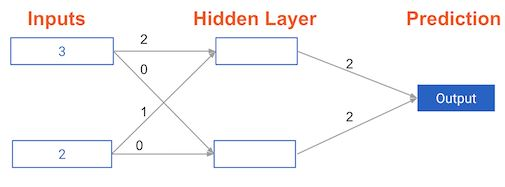

In [10]:
Image(filename='E:/pg/docs/BPB/Deep Learning/Images/fp_3.JPG')

The network generates a prediction of 16, which results in an error of 11

Understanding how weights change model accuracy?
Imagine you have to make a prediction for a single data point. The actual value of the target is 7. The weight going from node_0 to the output is 2, as shown below. If you increased it slightly, changing it to 2.01, would the predictions become more accurate, less accurate, or stay the same?

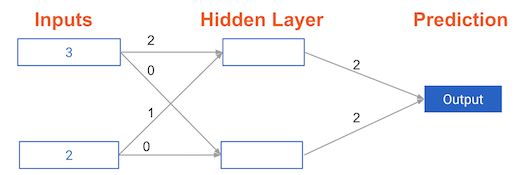

In [11]:
Image(filename='E:/pg/docs/BPB/Deep Learning/Images/fp_4.JPG')

Increasing the weight to 2.01 would increase the resulting error from 9 to 9.08, making the predictions less accurate.

Now you'll get to change weights in a real network and see how they affect model accuracy!

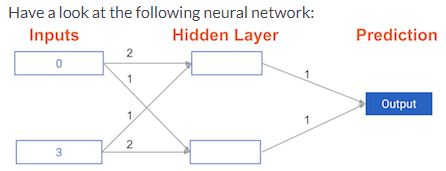

In [12]:
Image(filename='E:/pg/docs/BPB/Deep Learning/Images/fp_5.JPG')

In [13]:
# The data point you will make a prediction for
input_data = np.array([0, 3])

# Sample weights
weights_0 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output': [1, 1]
            }

# The actual target value, used to calculate the error
target_actual = 3

def predict_with_network(input_data, weights):
    # Calculate node 0 in the first hidden layer
    node_0_input = (input_data * weights['node_0']).sum()
    node_0_output = relu(node_0_input)

    # Calculate node 1 in the first hidden layer
    node_1_input = (input_data * weights['node_1']).sum()
    node_1_output = relu(node_1_input)

    # Put node values into array: hidden_0_outputs
    hidden_0_outputs = np.array([node_0_output, node_1_output])
    
    # Calculate output here: model_output
    model_output = (hidden_0_outputs * weights['output']).sum()
    
    # Return model_output
    return(model_output)

# Make prediction using original weights
model_output_0 = predict_with_network(input_data, weights_0)

# Calculate error: error_0
error_0 = model_output_0 - target_actual

# Create weights that cause the network to make perfect prediction (3): weights_1
weights_1 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output': [1, 0]
            }

# Make prediction using new weights: model_output_1
model_output_1 = predict_with_network(input_data, weights_1)

# Calculate error: error_1
error_1 = model_output_1 - target_actual

# Print error_0 and error_1
print(error_0)
print(error_1)

6
0


The network now generates a perfect prediction with an error of 0

You've seen how different weights will have different accuracies on a single prediction. But usually, you'll want to measure model accuracy on many points. You'll now write code to compare model accuracies for two different sets of weights, which have been stored as weights_0 and weights_1.

input_data is a list of arrays. Each item in that list contains the data to make a single prediction. target_actuals is a list of numbers. Each item in that list is the actual value we are trying to predict.

In this exercise, you'll use the mean_squared_error() function from sklearn.metrics. It takes the true values and the predicted values as arguments.

You'll also use the preloaded predict_with_network() function, which takes an array of data as the first argument, and weights as the second argument.

In [14]:
input_data = [np.array([0, 3]), np.array([1, 2]), np.array([-1, -2]), np.array([4, 0])]
target_actuals = [1, 3, 5, 7]

from sklearn.metrics import mean_squared_error

# Create model_output_0 
model_output_0 = []
# Create model_output_0
model_output_1 = []

# Loop over input_data
for row in input_data:
    # Append prediction to model_output_0
    model_output_0.append(predict_with_network(row, weights_0))
    
    # Append prediction to model_output_1
    model_output_1.append(predict_with_network(row, weights_1))

# Calculate the mean squared error for model_output_0: mse_0
mse_0 = mean_squared_error(target_actuals, model_output_0)

# Calculate the mean squared error for model_output_1: mse_1
mse_1 = mean_squared_error(target_actuals, model_output_1)

# Print mse_0 and mse_1
print("Mean squared error with weights_0: %f" %mse_0)
print("Mean squared error with weights_1: %f" %mse_1)

Mean squared error with weights_0: 37.500000
Mean squared error with weights_1: 7.750000


It looks like model_output_1 has a higher mean squared error.

Calculating slopes in Gradient Descent.
When plotting the mean-squared error loss function against predictions, the slope is 2 * x * (y-xb), or 2 * input_data * error. Note that x and b may have multiple numbers (x is a vector for each data point, and b is a vector). In this case, the output will also be a vector, which is exactly what you want.

In [15]:
weights = np.array([0, 2, 1])
input_data = np.array([1, 2, 3])
target = 0

# Calculate the predictions: preds
preds = (weights * input_data).sum()

# Calculate the error: error
error = target - preds

# Calculate the slope: slope
slope = 2 * input_data * error

# Print the slope
print(slope)

[-14 -28 -42]


You can now use this slope to improve the weights of the model!

Improving model weights
Hurray! You've just calculated the slopes you need. Now it's time to use those slopes to improve your model. If you add the slopes to your weights, you will move in the right direction. However, it's possible to move too far in that direction. So you will want to take a small step in that direction first, using a lower learning rate, and verify that the model is improving.

In [16]:
# Set the learning rate: learning_rate
learning_rate = 0.01

# Calculate the predictions: preds
preds = (weights * input_data).sum()

# Calculate the error: error
error =  preds - target

# Calculate the slope: slope
slope = 2 * input_data * error

# Update the weights: weights_updated
weights_updated = weights - learning_rate * slope

# Get updated predictions: preds_updated
preds_updated = (weights_updated * input_data).sum()

# Calculate updated error: error_updated
error_updated = preds_updated - target 

# Print the original error
print(error)

# Print the updated error
print(error_updated)

7
5.04


Updating the model weights did indeed decrease the error!

Making multiple updates to weights
You're now going to make multiple updates so you can dramatically improve your model weights, and see how the predictions improve with each update.

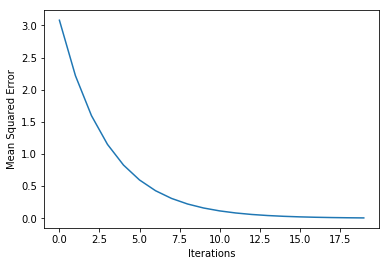

In [17]:
n_updates = 20
mse_hist = []
learning_rate = 0.01

def get_slope(input_data, target, weights):   
    preds = (weights * input_data).sum()
    error =  preds - target
    # Calculate the slope: slope
    slope = 2 * input_data * error
    return slope

def get_mse(input_data, target, weights):
    weights_updated = weights - learning_rate * slope
    preds_updated = (weights_updated * input_data).sum() 
    error_updated = preds_updated - target
    return error_updated
    
# Iterate over the number of updates
for i in range(n_updates):
    # Calculate the slope: slope
    slope = get_slope(input_data, target, weights)
    
    # Update the weights: weights
    weights = weights - 0.01 * slope
    
    # Calculate mse with new weights: mse
    mse = get_mse(input_data, target, weights)
    
    # Append the mse to mse_hist
    mse_hist.append(mse)

# Plot the mse history
plt.plot(mse_hist)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.show()

As you can see, the mean squared error decreases as the number of iterations go up

If you have gone through 4 iterations of calculating slopes (using backward propagation) and then updated weights, how many times must you have done forward propagation?
4 because Each time you generate predictions using forward propagation, you update the weights using backward propagation.

If your predictions were all exactly right, and your errors were all exactly 0, the slope of the loss function with respect to your predictions would also be 0. In that circumstance, The updates to all weights in the network would also be 0.

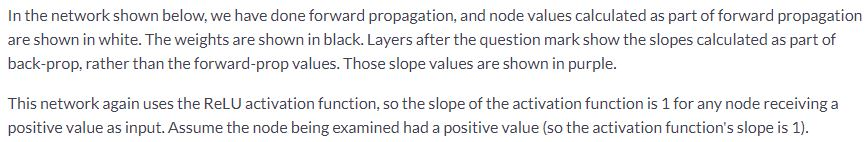

In [18]:
Image(filename='E:/pg/docs/BPB/Deep Learning/Images/fp_6.JPG')

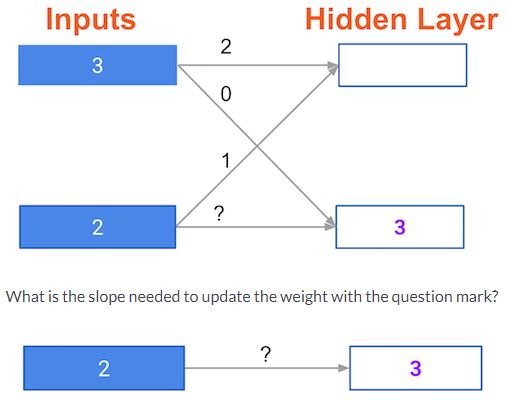

In [19]:
Image(filename='E:/pg/docs/BPB/Deep Learning/Images/fp_7.JPG')

6, The slope needed to update this weight is indeed 6.

You will soon start building models in Keras to predict wages based on various professional and demographic factors. Before you start building a model, it's good to understand your data by performing some exploratory analysis.

The data is pre-loaded into a pandas DataFrame called df. Use the .head() and .describe() methods in the IPython Shell for a quick overview of the DataFrame.

The target variable you'll be predicting is wage_per_hour. Some of the predictor variables are binary indicators, where a value of 1 represents True, and 0 represents False.

Look at the max and min values shown by df.describe(). Binary indicators will have a maximum value of 1 and minimum value of 0.

6

In [20]:
import pandas as pd

In [21]:
df = pd.read_csv('E:/pg/bpb/BPB-Publications/Datasets/deep/hourly_wages.csv')
df.describe()

,wage_per_hour,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
count,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000
mean,9.024064,0.179775,13.018727,17.822097,36.833333,0.458801,0.655431,0.292135,0.185393,0.044944
std,5.139097,0.384360,2.615373,12.379710,11.726573,0.498767,0.475673,0.455170,0.388981,0.207375
min,1.000000,0.000000,2.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.250000,0.000000,12.000000,8.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.780000,0.000000,12.000000,15.000000,35.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,11.250000,0.000000,15.000000,26.000000,44.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,44.500000,1.000000,18.000000,55.000000,64.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Now you'll get to work with your first model in Keras, and will immediately be able to run more complex neural network models on larger datasets compared to the first two chapters.

To start, you'll take the skeleton of a neural network and add a hidden layer and an output layer. You'll then fit that model and see Keras do the optimization so your model continually gets better.

As a start, you'll predict workers wages based on characteristics like their industry, education and level of experience. 

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 10 columns):
wage_per_hour     534 non-null float64
union             534 non-null int64
education_yrs     534 non-null int64
experience_yrs    534 non-null int64
age               534 non-null int64
female            534 non-null int64
marr              534 non-null int64
south             534 non-null int64
manufacturing     534 non-null int64
construction      534 non-null int64
dtypes: float64(1), int64(9)
memory usage: 41.8 KB


In [23]:
df.columns

Index(['wage_per_hour', 'union', 'education_yrs', 'experience_yrs', 'age',
       'female', 'marr', 'south', 'manufacturing', 'construction'],
      dtype='object')

In [24]:
target = df['wage_per_hour'].values
df = df.drop(['wage_per_hour'], axis=1).values

In [25]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential

# Save the number of columns in df: n_cols
n_cols = df.shape[1]

# Set up the model: model
model = Sequential()

# Add the first layer
model.add(Dense(50, activation='relu', input_shape=(n_cols,)))

# Add the second layer
model.add(Dense(32, activation='relu'))

# Add the output layer
model.add(Dense(1))

Using TensorFlow backend.


Now that you've specified the model, the next step is to compile it

You're now going to compile the model you specified earlier. To compile the model, you need to specify the optimizer and loss function to use.
https://keras.io/optimizers/#adam

In this exercise, you'll use the Adam optimizer and the mean squared error loss function. Go for it!
https://arxiv.org/abs/1412.6980v8

In [26]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Verify that model contains information from compiling
print("Loss function: " + model.loss)

Loss function: mean_squared_error


In [27]:
# Fit the model
model.fit(df, target)

Epoch 1/1
534/534 [==============================] - 4s 7ms/step - loss: 199.5163


Now you will start modeling with a new dataset for a classification problem. This data includes information about passengers on the Titanic. You will use predictors such as age, fare and where each passenger embarked from to predict who will survive. 

In [28]:
df = pd.read_csv('E:/pg/bpb/BPB-Publications/Datasets/deep/titanic_all_numeric.csv')
df.columns

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'male',
       'age_was_missing', 'embarked_from_cherbourg',
       'embarked_from_queenstown', 'embarked_from_southampton'],
      dtype='object')

It's smart to review the maximum and minimum values of each variable to ensure the data isn't misformatted or corrupted.

In [29]:
df.describe()

,survived,pclass,age,sibsp,parch,fare,male,embarked_from_cherbourg,embarked_from_queenstown,embarked_from_southampton
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587,0.188552,0.086420,0.722783
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,0.477990,0.391372,0.281141,0.447876
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,1.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000


You'll now create a classification model using the titanic dataset, which has been pre-loaded into a DataFrame called df. You'll take information about the passengers and predict which ones survived.

In [30]:
target = df['survived']
predictors = df.drop(['survived'], axis=1).values

In [31]:
# Convert the target to categorical: target
from keras.utils import to_categorical
target = to_categorical(target)

In [32]:
# Save the number of columns in df: n_cols
n_cols = predictors.shape[1]
print(n_cols)

10


Here, you'll use the 'sgd' optimizer, which stands for Stochastic Gradient Descent.

In [33]:
# Set up the model
model = Sequential()

# Add the first layer
model.add(Dense(32, activation='relu', input_shape=(n_cols,)))

# Add the output layer
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='sgd', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Fit the model
model.fit(predictors, target)

Epoch 1/1
891/891 [==============================] - 0s 531us/step - loss: 3.4049 - acc: 0.6016


This simple model is generating an accuracy of 60

In [35]:
# new data to predict
pred_data = np.array([[2, 34.0, 0, 0, 13.0, 1, False, 0, 0, 1],
       [2, 31.0, 1, 1, 26.25, 0, False, 0, 0, 1],
       [1, 11.0, 1, 2, 120.0, 1, False, 0, 0, 1],
       [3, 0.42, 0, 1, 8.5167, 1, False, 1, 0, 0],
       [3, 27.0, 0, 0, 6.975, 1, False, 0, 0, 1],
       [3, 31.0, 0, 0, 7.775, 1, False, 0, 0, 1],
       [1, 39.0, 0, 0, 0.0, 1, False, 0, 0, 1],
       [3, 18.0, 0, 0, 7.775, 0, False, 0, 0, 1],
       [2, 39.0, 0, 0, 13.0, 1, False, 0, 0, 1],
       [1, 33.0, 1, 0, 53.1, 0, False, 0, 0, 1],
       [3, 26.0, 0, 0, 7.8875, 1, False, 0, 0, 1],
       [3, 39.0, 0, 0, 24.15, 1, False, 0, 0, 1],
       [2, 35.0, 0, 0, 10.5, 1, False, 0, 0, 1],
       [3, 6.0, 4, 2, 31.275, 0, False, 0, 0, 1],
       [3, 30.5, 0, 0, 8.05, 1, False, 0, 0, 1],
       [1, 29.69911764705882, 0, 0, 0.0, 1, True, 0, 0, 1],
       [3, 23.0, 0, 0, 7.925, 0, False, 0, 0, 1],
       [2, 31.0, 1, 1, 37.0042, 1, False, 1, 0, 0],
       [3, 43.0, 0, 0, 6.45, 1, False, 0, 0, 1],
       [3, 10.0, 3, 2, 27.9, 1, False, 0, 0, 1],
       [1, 52.0, 1, 1, 93.5, 0, False, 0, 0, 1],
       [3, 27.0, 0, 0, 8.6625, 1, False, 0, 0, 1],
       [1, 38.0, 0, 0, 0.0, 1, False, 0, 0, 1],
       [3, 27.0, 0, 1, 12.475, 0, False, 0, 0, 1],
       [3, 2.0, 4, 1, 39.6875, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 6.95, 1, True, 0, 1, 0],
       [3, 29.69911764705882, 0, 0, 56.4958, 1, True, 0, 0, 1],
       [2, 1.0, 0, 2, 37.0042, 1, False, 1, 0, 0],
       [3, 29.69911764705882, 0, 0, 7.75, 1, True, 0, 1, 0],
       [1, 62.0, 0, 0, 80.0, 0, False, 0, 0, 0],
       [3, 15.0, 1, 0, 14.4542, 0, False, 1, 0, 0],
       [2, 0.83, 1, 1, 18.75, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 7.2292, 1, True, 1, 0, 0],
       [3, 23.0, 0, 0, 7.8542, 1, False, 0, 0, 1],
       [3, 18.0, 0, 0, 8.3, 1, False, 0, 0, 1],
       [1, 39.0, 1, 1, 83.1583, 0, False, 1, 0, 0],
       [3, 21.0, 0, 0, 8.6625, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 8.05, 1, True, 0, 0, 1],
       [3, 32.0, 0, 0, 56.4958, 1, False, 0, 0, 1],
       [1, 29.69911764705882, 0, 0, 29.7, 1, True, 1, 0, 0],
       [3, 20.0, 0, 0, 7.925, 1, False, 0, 0, 1],
       [2, 16.0, 0, 0, 10.5, 1, False, 0, 0, 1],
       [1, 30.0, 0, 0, 31.0, 0, False, 1, 0, 0],
       [3, 34.5, 0, 0, 6.4375, 1, False, 1, 0, 0],
       [3, 17.0, 0, 0, 8.6625, 1, False, 0, 0, 1],
       [3, 42.0, 0, 0, 7.55, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 8, 2, 69.55, 1, True, 0, 0, 1],
       [3, 35.0, 0, 0, 7.8958, 1, False, 1, 0, 0],
       [2, 28.0, 0, 1, 33.0, 1, False, 0, 0, 1],
       [1, 29.69911764705882, 1, 0, 89.1042, 0, True, 1, 0, 0],
       [3, 4.0, 4, 2, 31.275, 1, False, 0, 0, 1],
       [3, 74.0, 0, 0, 7.775, 1, False, 0, 0, 1],
       [3, 9.0, 1, 1, 15.2458, 0, False, 1, 0, 0],
       [1, 16.0, 0, 1, 39.4, 0, False, 0, 0, 1],
       [2, 44.0, 1, 0, 26.0, 0, False, 0, 0, 1],
       [3, 18.0, 0, 1, 9.35, 0, False, 0, 0, 1],
       [1, 45.0, 1, 1, 164.8667, 0, False, 0, 0, 1],
       [1, 51.0, 0, 0, 26.55, 1, False, 0, 0, 1],
       [3, 24.0, 0, 3, 19.2583, 0, False, 1, 0, 0],
       [3, 29.69911764705882, 0, 0, 7.2292, 1, True, 1, 0, 0],
       [3, 41.0, 2, 0, 14.1083, 1, False, 0, 0, 1],
       [2, 21.0, 1, 0, 11.5, 1, False, 0, 0, 1],
       [1, 48.0, 0, 0, 25.9292, 0, False, 0, 0, 1],
       [3, 29.69911764705882, 8, 2, 69.55, 0, True, 0, 0, 1],
       [2, 24.0, 0, 0, 13.0, 1, False, 0, 0, 1],
       [2, 42.0, 0, 0, 13.0, 0, False, 0, 0, 1],
       [2, 27.0, 1, 0, 13.8583, 0, False, 1, 0, 0],
       [1, 31.0, 0, 0, 50.4958, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 9.5, 1, True, 0, 0, 1],
       [3, 4.0, 1, 1, 11.1333, 1, False, 0, 0, 1],
       [3, 26.0, 0, 0, 7.8958, 1, False, 0, 0, 1],
       [1, 47.0, 1, 1, 52.5542, 0, False, 0, 0, 1],
       [1, 33.0, 0, 0, 5.0, 1, False, 0, 0, 1],
       [3, 47.0, 0, 0, 9.0, 1, False, 0, 0, 1],
       [2, 28.0, 1, 0, 24.0, 0, False, 1, 0, 0],
       [3, 15.0, 0, 0, 7.225, 0, False, 1, 0, 0],
       [3, 20.0, 0, 0, 9.8458, 1, False, 0, 0, 1],
       [3, 19.0, 0, 0, 7.8958, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 7.8958, 1, True, 0, 0, 1],
       [1, 56.0, 0, 1, 83.1583, 0, False, 1, 0, 0],
       [2, 25.0, 0, 1, 26.0, 0, False, 0, 0, 1],
       [3, 33.0, 0, 0, 7.8958, 1, False, 0, 0, 1],
       [3, 22.0, 0, 0, 10.5167, 0, False, 0, 0, 1],
       [2, 28.0, 0, 0, 10.5, 1, False, 0, 0, 1],
       [3, 25.0, 0, 0, 7.05, 1, False, 0, 0, 1],
       [3, 39.0, 0, 5, 29.125, 0, False, 0, 1, 0],
       [2, 27.0, 0, 0, 13.0, 1, False, 0, 0, 1],
       [1, 19.0, 0, 0, 30.0, 0, False, 0, 0, 1],
       [3, 29.69911764705882, 1, 2, 23.45, 0, True, 0, 0, 1],
       [1, 26.0, 0, 0, 30.0, 1, False, 1, 0, 0],
       [3, 32.0, 0, 0, 7.75, 1, False, 0, 1, 0]])

Create your predictions using the model's .predict() method on pred_data.
Use NumPy indexing to find the column corresponding to predicted probabilities of survival being True. This is the second column (index 1) of predictions. Store the result in predicted_prob_true and print it.

In [36]:
# Calculate predictions: predictions
predictions = model.predict(pred_data)

# Calculate predicted probability of survival: predicted_prob_true
predicted_prob_true = predictions[:,1]

# print predicted_prob_true
print(predicted_prob_true)

[  5.02823495e-05   2.33806823e-05   3.93927113e-09   1.11944854e-01
   4.27916879e-04   1.46789578e-04   3.77692631e-05   3.87188746e-03
   1.45785280e-05   3.75338971e-07   4.98019625e-04   3.78888603e-06
   5.07359800e-05   1.98096456e-03   1.61375821e-04   4.08867461e-04
   1.06747763e-03   5.07472259e-06   6.76652689e-06   8.36029765e-04
   7.01213957e-12   3.59023659e-04   4.91273131e-05   2.07662219e-04
   2.14340095e-03   1.31542431e-04   1.72031164e-07   3.72827216e-03
   1.23369275e-04   2.52341602e-11   2.35267542e-03   5.23388013e-02
   1.51263885e-04   1.04659493e-03   3.64604243e-03   2.61176553e-10
   1.63123675e-03   1.74816974e-04   1.21621511e-07   1.92279749e-05
   2.21638358e-03   5.70097519e-03   1.78561859e-05   4.48975807e-05
   4.38907044e-03   8.27041276e-06   1.43546117e-08   3.73186485e-05
   2.04235530e-05   1.13751752e-09   3.50623298e-03   1.81222282e-09
   7.37123098e-03   4.46244849e-05   1.04320236e-06   2.69052642e-03
   3.38003945e-16   2.14614829e-07

You're now ready to begin learning how to fine-tune your models

following could prevent a model from showing an improved loss in its first few epochs-
1. Learning rate too low.
2. Learning rate too high.
3. Poor choice of activation function.

Changing optimization parameters
It's time to get your hands dirty with optimization. You'll now try optimizing a model at a very low learning rate, a very high learning rate, and a "just right" learning rate. You'll want to look at the results after running this exercise, remembering that a low value for the loss function is good.

In [38]:
# Save the number of columns in df: n_cols
n_cols = predictors.shape[1]
input_shape = n_cols
def get_new_model(input_shape = input_shape):
    # Set up the model
    model = Sequential()
    # Add the first layer
    model.add(Dense(100, activation='relu', input_shape=input_shape))
    # Add the second layer
    model.add(Dense(100, activation='relu'))
    # Add the output layer
    model.add(Dense(2, activation='softmax'))
    return(model)

In [39]:
# Import the SGD optimizer
from keras.optimizers import SGD

# Create list of learning rates: lr_to_test
lr_to_test = [.000001, 0.01, 1]

# Loop over learning rates
for lr in lr_to_test:
    print('\n\nTesting model with learning rate: %f\n'%lr )
    
    # Build new model to test, unaffected by previous models
    model = get_new_model()
    
    # Create SGD optimizer with specified learning rate: my_optimizer
    my_optimizer = SGD(lr=lr)
    
    # Compile the model
    model.compile(optimizer=my_optimizer, loss='categorical_crossentropy')
    
    # Fit the model
    model.fit(predictors, target)




Testing model with learning rate: 0.000001

Epoch 1/1
891/891 [==============================] - 1s 602us/step - loss: 2.3555


Testing model with learning rate: 0.010000

Epoch 1/1
891/891 [==============================] - 0s 268us/step - loss: 1.5410


Testing model with learning rate: 1.000000

Epoch 1/1
891/891 [==============================] - 0s 285us/step - loss: 6.0529


It is quite visible that with learning rate 0.01 loss is less

Evaluating model accuracy on validation dataset
Now it's your turn to monitor model accuracy with a validation data set. A model definition has been provided as model. Your job is to add the code to compile it and then fit it. You'll check the validation score in each epoch.

In [40]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
hist = model.fit(predictors, target, validation_split=0.3,)

Train on 623 samples, validate on 268 samples
Epoch 1/1
623/623 [==============================] - 0s 622us/step - loss: 6.3644 - acc: 0.6051 - val_loss: 5.7736 - val_acc: 0.6418


Early stopping: Optimizing the optimization
Now that you know how to monitor your model performance throughout optimization, you can use early stopping to stop optimization when it isn't helping any more. Since the optimization stops automatically when it isn't helping, you can also set a high value for epochs in your call to .fit()

In [42]:
# Import EarlyStopping
from keras.callbacks import EarlyStopping
#Create an EarlyStopping object called early_stopping_monitor. 
#Stop optimization when the validation loss hasn't improved for 2 epochs 
#by specifying the patience parameter of EarlyStopping() to be 2
# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Fit the model
model.fit(predictors, target, validation_split=0.3,epochs=30, callbacks=[early_stopping_monitor])

Train on 623 samples, validate on 268 samples
Epoch 1/30
623/623 [==============================] - 0s 58us/step - loss: 6.3644 - acc: 0.6051 - val_loss: 5.7736 - val_acc: 0.6418
Epoch 2/30
623/623 [==============================] - 0s 61us/step - loss: 6.3644 - acc: 0.6051 - val_loss: 5.7736 - val_acc: 0.6418
Epoch 3/30
623/623 [==============================] - 0s 61us/step - loss: 6.3644 - acc: 0.6051 - val_loss: 5.7736 - val_acc: 0.6418


Because optimization will automatically stop when it is no longer helpful, it is okay to specify the maximum number of epochs as 30 rather than using the default of 10 that you've used so far.

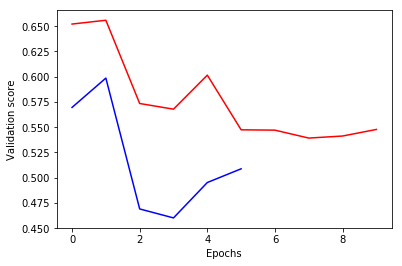

In [43]:
# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Set up the first model
model_1 = Sequential()
model_1.add(Dense(10, activation='relu', input_shape=input_shape))
model_1.add(Dense(10, activation='relu'))
model_1.add(Dense(2, activation='softmax'))
# Compile model_1
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Create the new model: model_2
model_2 = Sequential()

# Add the first and second layers
model_2.add(Dense(100, activation='relu', input_shape=input_shape))
model_2.add(Dense(100, activation='relu'))

# Add the output layer
model_2.add(Dense(2, activation='softmax'))

# Compile model_2
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit model_1
model_1_training = model_1.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

# Fit model_2
model_2_training = model_2.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

The blue model is the one you made, the red is the original model.

Adding layers to a network
You've seen how to experiment with wider networks. In this exercise, you'll try a deeper network (more hidden layers).

Once again, you have a baseline model called model_1 as a starting point. It has 1 hidden layer, with 50 units. You can see a summary of that model's structure printed out. You will create a similar network with 3 hidden layers (still keeping 50 units in each layer).

This will again take a moment to fit both models, so you'll need to wait a few seconds to see the results after you run your code.

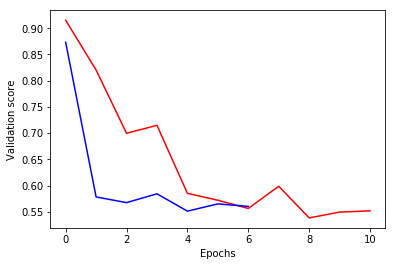

In [45]:
# Set up the first model
model_1 = Sequential()
model_1.add(Dense(50, activation='relu', input_shape=input_shape))
model_1.add(Dense(2, activation='softmax'))
# Compile model_1
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Create the new model: model_2
model_2 = Sequential()
# Add the first, second, and third hidden layers
model_2.add(Dense(50, activation='relu', input_shape=input_shape))
model_2.add(Dense(50, activation='relu'))
model_2.add(Dense(50, activation='relu'))
# Add the output layer
model_2.add(Dense(2, activation='softmax'))

# Compile model_2
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit model 1
model_1_training = model_1.fit(predictors, target, epochs=20, validation_split=0.4, callbacks=[early_stopping_monitor], verbose=False)

# Fit model 2
model_2_training = model_2.fit(predictors, target, epochs=20, validation_split=0.4, callbacks=[early_stopping_monitor], verbose=False)

# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

Experimenting with model structures
You've just run an experiment where you compared two networks that were identical except that the 2nd network had an extra hidden layer. You see that this 2nd network (the deeper network) had better performance. Given that, which of the following would be a good experiment to run next for even better performance?

Use more units in each hidden layer.Increasing the number of units in each hidden layer would be a good next step to try achieving even better performance.

Case Study- MNIST Digit Prediction from Images

In [47]:
import os

In [48]:
# load and check data
if os.path.isfile('E:/pg/bpb/BPB-Publications/Datasets/deep/digits/train.csv'):
    data_df = pd.read_csv('E:/pg/bpb/BPB-Publications/Datasets/deep/digits/train.csv') # on kaggle 
    print('train.csv loaded: data_df({0[0]},{0[1]})'.format(data_df.shape))
elif os.path.isfile('data/train.csv'):
    data_df = pd.read_csv('E:/pg/bpb/BPB-Publications/Datasets/deep/digits/train.csv') # on local environment
    print('train.csv loaded: data_df({0[0]},{0[1]})'.format(data_df.shape))
else:
    print('Error: file not found')

print(data_df.isnull().any().describe())

# 10 different labels ranging from 0 to 9
print('')
print('distinct labels ', data_df['label'].unique())

# data are approximately balanced (less often occurs 5, most often 1)
print(data_df['label'].value_counts())

train.csv loaded: data_df(42000,785)
count       785
unique        1
top       False
freq        785
dtype: object

distinct labels  [1 0 4 7 3 5 8 9 2 6]
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64


In [53]:
data_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [49]:
# function to normalize data
def normalize_data(data): 
    # scale features using statistics that are robust to outliers
    data = data / data.max() # convert from [0:255] to [0.:1.]
    return data

In [54]:
# convert class labels from scalars to one-hot vectors e.g. 1 => [0 1 0 0 0 0 0 0 0 0]
def dense_to_one_hot(labels_dense, num_classes):
    num_labels = labels_dense.shape[0]
    index_offset = np.arange(num_labels) * num_classes
    labels_one_hot = np.zeros((num_labels, num_classes))
    labels_one_hot.flat[index_offset + labels_dense.ravel()] = 1
    return labels_one_hot

In [55]:
# convert one-hot encodings into labels
def one_hot_to_dense(labels_one_hot):
    return np.argmax(labels_one_hot,1)

In [56]:
# computet the accuracy of label predictions
def accuracy_from_dense_labels(y_target, y_pred):
    y_target = y_target.reshape(-1,)
    y_pred = y_pred.reshape(-1,)
    return np.mean(y_target == y_pred)

In [57]:
# computet the accuracy of one-hot encoded predictions
def accuracy_from_one_hot_labels(y_target, y_pred):
    y_target = one_hot_to_dense(y_target).reshape(-1,)
    y_pred = one_hot_to_dense(y_pred).reshape(-1,)
    return np.mean(y_target == y_pred)

In [58]:
# extract and normalize images
x_train_valid = data_df.iloc[:,1:].values.reshape(-1,28,28,1) # (42000,28,28,1) array
x_train_valid = x_train_valid.astype(np.float) # convert from int64 to float32
x_train_valid = normalize_data(x_train_valid)
image_width = image_height = 28
image_size = 784

In [59]:
# extract image labels
y_train_valid_labels = data_df.iloc[:,0].values # (42000,1) array
labels_count = np.unique(y_train_valid_labels).shape[0]; # number of different labels = 10

In [61]:
%matplotlib inline
import matplotlib.cm as cm

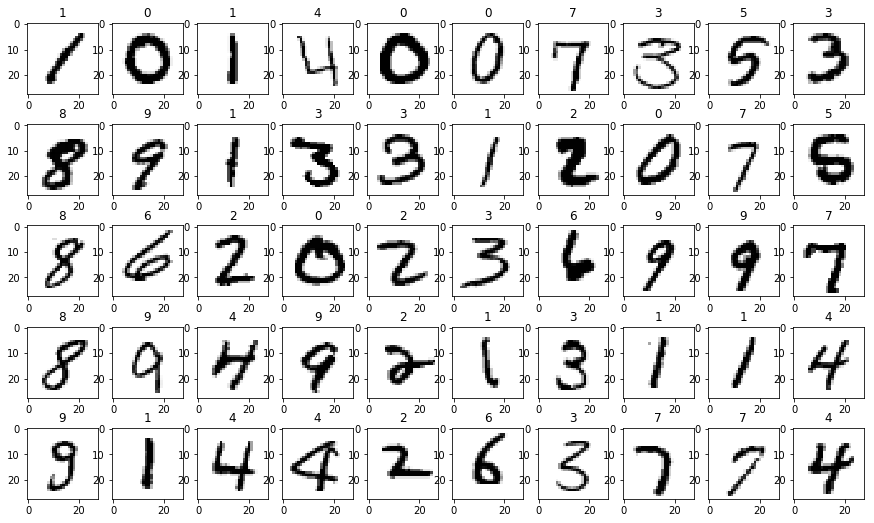

In [62]:
#plot some images and labels
plt.figure(figsize=(15,9))
for i in range(50):
    plt.subplot(5,10,1+i)
    plt.title(y_train_valid_labels[i])
    plt.imshow(x_train_valid[i].reshape(28,28), cmap=cm.binary)

In [63]:
# labels in one hot representation
y_train_valid = dense_to_one_hot(y_train_valid_labels, labels_count).astype(np.uint8)

In [64]:
# dictionaries for saving results
y_valid_pred = {}
y_train_pred = {}
y_test_pred = {}
train_loss, valid_loss = {}, {}
train_acc, valid_acc = {}, {}

print('x_train_valid.shape = ', x_train_valid.shape)
print('y_train_valid_labels.shape = ', y_train_valid_labels.shape)
print('image size = ', image_size )
print('image width = ', image_width)
print('image height = ', image_height)
print('labels count = ', labels_count)

x_train_valid.shape =  (42000, 28, 28, 1)
y_train_valid_labels.shape =  (42000,)
image size =  784
image width =  28
image height =  28
labels count =  10


In [65]:
# generate new images via rotations, translations, zoom using keras
def generate_images(imgs):
    
    # rotations, translations, zoom
    image_generator = keras.preprocessing.image.ImageDataGenerator(
        rotation_range = 10, width_shift_range = 0.1 , height_shift_range = 0.1,
        zoom_range = 0.1)

    # get transformed images
    imgs = image_generator.flow(imgs.copy(), np.zeros(len(imgs)),
                                batch_size=len(imgs), shuffle = False).next()    
  
    return imgs[0]

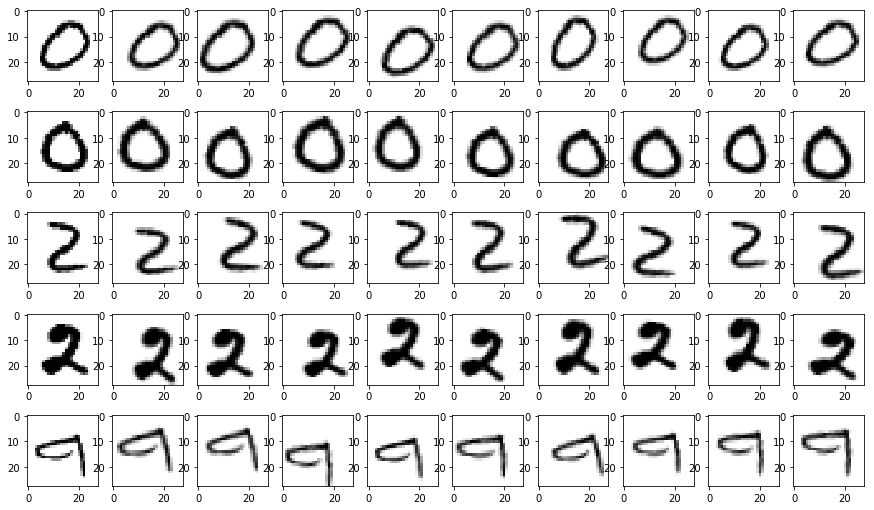

In [67]:
import keras.preprocessing.image
# check image generation
fig,axs = plt.subplots(5,10, figsize=(15,9))
for i in range(5):
    n = np.random.randint(0,x_train_valid.shape[0]-2)
    axs[i,0].imshow(x_train_valid[n:n+1].reshape(28,28),cmap=cm.binary)
    axs[i,1].imshow(generate_images(x_train_valid[n:n+1]).reshape(28,28), cmap=cm.binary)
    axs[i,2].imshow(generate_images(x_train_valid[n:n+1]).reshape(28,28), cmap=cm.binary)
    axs[i,3].imshow(generate_images(x_train_valid[n:n+1]).reshape(28,28), cmap=cm.binary)
    axs[i,4].imshow(generate_images(x_train_valid[n:n+1]).reshape(28,28), cmap=cm.binary)
    axs[i,5].imshow(generate_images(x_train_valid[n:n+1]).reshape(28,28), cmap=cm.binary)
    axs[i,6].imshow(generate_images(x_train_valid[n:n+1]).reshape(28,28), cmap=cm.binary)
    axs[i,7].imshow(generate_images(x_train_valid[n:n+1]).reshape(28,28), cmap=cm.binary)
    axs[i,8].imshow(generate_images(x_train_valid[n:n+1]).reshape(28,28), cmap=cm.binary)
    axs[i,9].imshow(generate_images(x_train_valid[n:n+1]).reshape(28,28), cmap=cm.binary)

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import sklearn.preprocessing
import sklearn.metrics
import sklearn.linear_model
import sklearn.naive_bayes
import sklearn.tree
import sklearn.ensemble
import datetime

In [72]:
# First try out some basic sklearn models
logreg = sklearn.linear_model.LogisticRegression(verbose=0, solver='lbfgs',
                                                 multi_class='multinomial')
decision_tree = sklearn.tree.DecisionTreeClassifier()
extra_trees = sklearn.ensemble.ExtraTreesClassifier(verbose=0)
gradient_boost = sklearn.ensemble.GradientBoostingClassifier(verbose=0)
random_forest = sklearn.ensemble.RandomForestClassifier(verbose=0)
gaussianNB = sklearn.naive_bayes.GaussianNB()

# store models in dictionary
base_models = {'logreg': logreg, 'extra_trees': extra_trees,
               'gradient_boost': gradient_boost, 'random_forest': random_forest, 
               'decision_tree': decision_tree, 'gaussianNB': gaussianNB}

# choose models for out-of-folds predictions
take_models = ['logreg','random_forest','extra_trees']

for mn in take_models:
    train_acc[mn] = []
    valid_acc[mn] = []
    
# cross validations
cv_num = 10 # cross validations default = 20 => 5% validation set
kfold = sklearn.model_selection.KFold(cv_num, shuffle=True, random_state=123)

for i,(train_index, valid_index) in enumerate(kfold.split(x_train_valid)):

    # start timer
    start = datetime.datetime.now();

    # train and validation data of original images
    x_train = x_train_valid[train_index].reshape(-1,784)
    y_train = y_train_valid[train_index]
    x_valid = x_train_valid[valid_index].reshape(-1,784)
    y_valid = y_train_valid[valid_index]

    for mn in take_models:

        # create cloned model from base models
        model = sklearn.base.clone(base_models[mn])
        model.fit(x_train, one_hot_to_dense(y_train))

        # predictions
        y_train_pred[mn] = model.predict_proba(x_train)
        y_valid_pred[mn] = model.predict_proba(x_valid)
        train_acc[mn].append(accuracy_from_one_hot_labels(y_train_pred[mn], y_train))
        valid_acc[mn].append(accuracy_from_one_hot_labels(y_valid_pred[mn], y_valid))

        print(i,': '+mn+' train/valid accuracy = %.3f/%.3f'%(train_acc[mn][-1], 
                                                             valid_acc[mn][-1]))
    # only one iteration
    if False:
        break;

print(mn+': averaged train/valid accuracy = %.3f/%.3f'%(np.mean(train_acc[mn]),
                                                        np.mean(valid_acc[mn])))

0 : logreg train/valid accuracy = 0.940/0.920
0 : random_forest train/valid accuracy = 0.999/0.940
0 : extra_trees train/valid accuracy = 1.000/0.949
1 : logreg train/valid accuracy = 0.940/0.921
1 : random_forest train/valid accuracy = 0.999/0.940
1 : extra_trees train/valid accuracy = 1.000/0.951
2 : logreg train/valid accuracy = 0.939/0.929
2 : random_forest train/valid accuracy = 0.999/0.944
2 : extra_trees train/valid accuracy = 1.000/0.946
3 : logreg train/valid accuracy = 0.939/0.925
3 : random_forest train/valid accuracy = 0.999/0.941
3 : extra_trees train/valid accuracy = 1.000/0.951
4 : logreg train/valid accuracy = 0.940/0.921
4 : random_forest train/valid accuracy = 0.999/0.944
4 : extra_trees train/valid accuracy = 1.000/0.947
5 : logreg train/valid accuracy = 0.939/0.918
5 : random_forest train/valid accuracy = 0.999/0.936
5 : extra_trees train/valid accuracy = 1.000/0.943
6 : logreg train/valid accuracy = 0.941/0.916
6 : random_forest train/valid accuracy = 0.999/0.940
6

logreg averaged train/valid accuracy = 0.940/0.920
random_forest averaged train/valid accuracy = 0.999/0.940
extra_trees averaged train/valid accuracy = 1.000/0.946


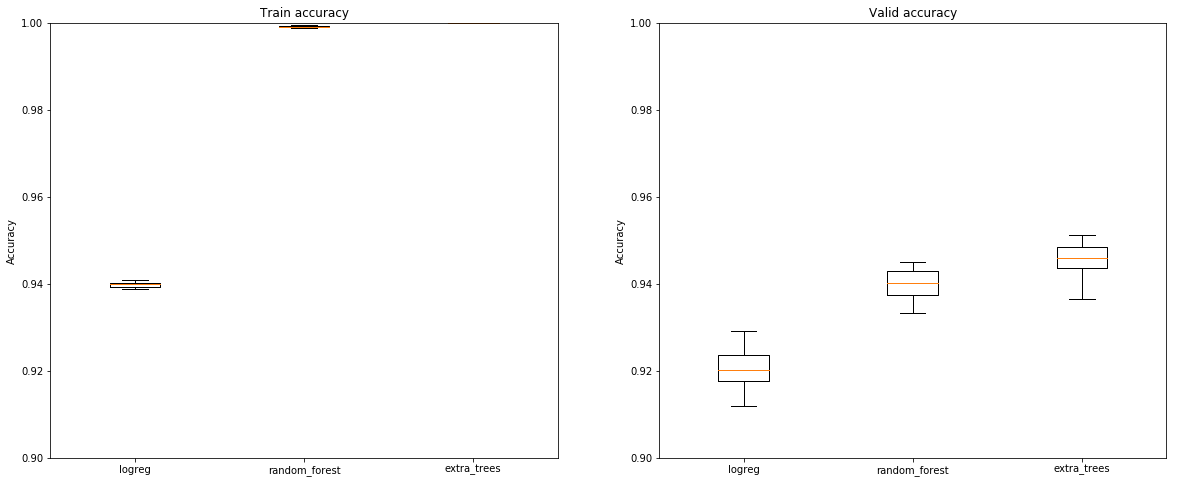

In [73]:
# boxplot algorithm comparison
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(1,2,1)
plt.title('Train accuracy')
plt.boxplot([train_acc[mn] for mn in train_acc.keys()])
ax.set_xticklabels([mn for mn in train_acc.keys()])
ax.set_ylabel('Accuracy');
ax.set_ylim([0.90,1.0])

ax = fig.add_subplot(1,2,2)
plt.title('Valid accuracy')
plt.boxplot([valid_acc[mn] for mn in train_acc.keys()])
ax.set_xticklabels([mn for mn in train_acc.keys()])
ax.set_ylabel('Accuracy');
ax.set_ylim([0.90,1.0])

for mn in train_acc.keys():
    print(mn + ' averaged train/valid accuracy = %.3f/%.3f'%(np.mean(train_acc[mn]),
                                                             np.mean(valid_acc[mn])))

In [74]:
class nn_class:
# class that implements the neural network

    # constructor
    def __init__(self, nn_name = 'nn_1'):

        # tunable hyperparameters for nn architecture
        self.s_f_conv1 = 3; # filter size of first convolution layer (default = 3)
        self.n_f_conv1 = 36; # number of features of first convolution layer (default = 36)
        self.s_f_conv2 = 3; # filter size of second convolution layer (default = 3)
        self.n_f_conv2 = 36; # number of features of second convolution layer (default = 36)
        self.s_f_conv3 = 3; # filter size of third convolution layer (default = 3)
        self.n_f_conv3 = 36; # number of features of third convolution layer (default = 36)
        self.n_n_fc1 = 576; # number of neurons of first fully connected layer (default = 576)

        # tunable hyperparameters for training
        self.mb_size = 50 # mini batch size
        self.keep_prob = 0.33 # keeping probability with dropout regularization 
        self.learn_rate_array = [10*1e-4, 7.5*1e-4, 5*1e-4, 2.5*1e-4, 1*1e-4, 1*1e-4,
                                 1*1e-4,0.75*1e-4, 0.5*1e-4, 0.25*1e-4, 0.1*1e-4, 
                                 0.1*1e-4, 0.075*1e-4,0.050*1e-4, 0.025*1e-4, 0.01*1e-4, 
                                 0.0075*1e-4, 0.0050*1e-4,0.0025*1e-4,0.001*1e-4]
        self.learn_rate_step_size = 3 # in terms of epochs
        
        # parameters
        self.learn_rate = self.learn_rate_array[0]
        self.learn_rate_pos = 0 # current position pointing to current learning rate
        self.index_in_epoch = 0 
        self.current_epoch = 0
        self.log_step = 0.2 # log results in terms of epochs
        self.n_log_step = 0 # counting current number of mini batches trained on
        self.use_tb_summary = False # True = use tensorboard visualization
        self.use_tf_saver = False # True = use saver to save the model
        self.nn_name = nn_name # name of the neural network
        
        # permutation array
        self.perm_array = np.array([])
        
    # function to get the next mini batch
    def next_mini_batch(self):

        start = self.index_in_epoch
        self.index_in_epoch += self.mb_size
        self.current_epoch += self.mb_size/len(self.x_train)  
        
        # adapt length of permutation array
        if not len(self.perm_array) == len(self.x_train):
            self.perm_array = np.arange(len(self.x_train))
        
        # shuffle once at the start of epoch
        if start == 0:
            np.random.shuffle(self.perm_array)

        # at the end of the epoch
        if self.index_in_epoch > self.x_train.shape[0]:
            np.random.shuffle(self.perm_array) # shuffle data
            start = 0 # start next epoch
            self.index_in_epoch = self.mb_size # set index to mini batch size
            
            if self.train_on_augmented_data:
                # use augmented data for the next epoch
                self.x_train_aug = normalize_data(self.generate_images(self.x_train))
                self.y_train_aug = self.y_train
                
        
        end = self.index_in_epoch
        
        if self.train_on_augmented_data:
            # use augmented data
            x_tr = self.x_train_aug[self.perm_array[start:end]]
            y_tr = self.y_train_aug[self.perm_array[start:end]]
        else:
            # use original data
            x_tr = self.x_train[self.perm_array[start:end]]
            y_tr = self.y_train[self.perm_array[start:end]]
        
        return x_tr, y_tr
               
    # generate new images via rotations, translations, zoom using keras
    def generate_images(self, imgs):
    
        print('generate new set of images')
        
        # rotations, translations, zoom
        image_generator = keras.preprocessing.image.ImageDataGenerator(
            rotation_range = 10, width_shift_range = 0.1 , height_shift_range = 0.1,
            zoom_range = 0.1)

        # get transformed images
        imgs = image_generator.flow(imgs.copy(), np.zeros(len(imgs)),
                                    batch_size=len(imgs), shuffle = False).next()    

        return imgs[0]

    # weight initialization
    def weight_variable(self, shape, name = None):
        initial = tf.truncated_normal(shape, stddev=0.1)
        return tf.Variable(initial, name = name)

    # bias initialization
    def bias_variable(self, shape, name = None):
        initial = tf.constant(0.1, shape=shape) #  positive bias
        return tf.Variable(initial, name = name)

    # 2D convolution
    def conv2d(self, x, W, name = None):
        return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME', name = name)

    # max pooling
    def max_pool_2x2(self, x, name = None):
        return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1],
                              padding='SAME', name = name)

    # attach summaries to a tensor for TensorBoard visualization
    def summary_variable(self, var, var_name):
        with tf.name_scope(var_name):
            mean = tf.reduce_mean(var)
            stddev = tf.sqrt(tf.reduce_mean(tf.square(var - mean)))
            tf.summary.scalar('mean', mean)
            tf.summary.scalar('stddev', stddev)
            tf.summary.scalar('max', tf.reduce_max(var))
            tf.summary.scalar('min', tf.reduce_min(var))
            tf.summary.histogram('histogram', var)
    
    # function to create the graph
    def create_graph(self):

        # reset default graph
        tf.reset_default_graph()

        # variables for input and output 
        self.x_data_tf = tf.placeholder(dtype=tf.float32, shape=[None,28,28,1], 
                                        name='x_data_tf')
        self.y_data_tf = tf.placeholder(dtype=tf.float32, shape=[None,10], name='y_data_tf')

        # 1.layer: convolution + max pooling
        self.W_conv1_tf = self.weight_variable([self.s_f_conv1, self.s_f_conv1, 1,
                                                self.n_f_conv1], 
                                               name = 'W_conv1_tf') # (5,5,1,32)
        self.b_conv1_tf = self.bias_variable([self.n_f_conv1], name = 'b_conv1_tf') # (32)
        self.h_conv1_tf = tf.nn.relu(self.conv2d(self.x_data_tf, 
                                                 self.W_conv1_tf) + self.b_conv1_tf, 
                                     name = 'h_conv1_tf') # (.,28,28,32)
        self.h_pool1_tf = self.max_pool_2x2(self.h_conv1_tf, 
                                            name = 'h_pool1_tf') # (.,14,14,32)

        # 2.layer: convolution + max pooling
        self.W_conv2_tf = self.weight_variable([self.s_f_conv2, self.s_f_conv2, 
                                                self.n_f_conv1, self.n_f_conv2], 
                                               name = 'W_conv2_tf')
        self.b_conv2_tf = self.bias_variable([self.n_f_conv2], name = 'b_conv2_tf')
        self.h_conv2_tf = tf.nn.relu(self.conv2d(self.h_pool1_tf, 
                                                 self.W_conv2_tf) + self.b_conv2_tf, 
                                     name ='h_conv2_tf') #(.,14,14,32)
        self.h_pool2_tf = self.max_pool_2x2(self.h_conv2_tf, name = 'h_pool2_tf') #(.,7,7,32)

        # 3.layer: convolution + max pooling
        self.W_conv3_tf = self.weight_variable([self.s_f_conv3, self.s_f_conv3, 
                                                self.n_f_conv2, self.n_f_conv3], 
                                               name = 'W_conv3_tf')
        self.b_conv3_tf = self.bias_variable([self.n_f_conv3], name = 'b_conv3_tf')
        self.h_conv3_tf = tf.nn.relu(self.conv2d(self.h_pool2_tf, 
                                                 self.W_conv3_tf) + self.b_conv3_tf, 
                                     name = 'h_conv3_tf') #(.,7,7,32)
        self.h_pool3_tf = self.max_pool_2x2(self.h_conv3_tf, 
                                            name = 'h_pool3_tf') # (.,4,4,32)

        # 4.layer: fully connected
        self.W_fc1_tf = self.weight_variable([4*4*self.n_f_conv3,self.n_n_fc1], 
                                             name = 'W_fc1_tf') # (4*4*32, 1024)
        self.b_fc1_tf = self.bias_variable([self.n_n_fc1], name = 'b_fc1_tf') # (1024)
        self.h_pool3_flat_tf = tf.reshape(self.h_pool3_tf, [-1,4*4*self.n_f_conv3], 
                                          name = 'h_pool3_flat_tf') # (.,1024)
        self.h_fc1_tf = tf.nn.relu(tf.matmul(self.h_pool3_flat_tf, 
                                             self.W_fc1_tf) + self.b_fc1_tf, 
                                   name = 'h_fc1_tf') # (.,1024)
      
        # add dropout
        self.keep_prob_tf = tf.placeholder(dtype=tf.float32, name = 'keep_prob_tf')
        self.h_fc1_drop_tf = tf.nn.dropout(self.h_fc1_tf, self.keep_prob_tf, 
                                           name = 'h_fc1_drop_tf')

        # 5.layer: fully connected
        self.W_fc2_tf = self.weight_variable([self.n_n_fc1, 10], name = 'W_fc2_tf')
        self.b_fc2_tf = self.bias_variable([10], name = 'b_fc2_tf')
        self.z_pred_tf = tf.add(tf.matmul(self.h_fc1_drop_tf, self.W_fc2_tf), 
                                self.b_fc2_tf, name = 'z_pred_tf')# => (.,10)

        # cost function
        self.cross_entropy_tf = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
            labels=self.y_data_tf, logits=self.z_pred_tf), name = 'cross_entropy_tf')
     
        # optimisation function
        self.learn_rate_tf = tf.placeholder(dtype=tf.float32, name="learn_rate_tf")
        self.train_step_tf = tf.train.AdamOptimizer(self.learn_rate_tf).minimize(
            self.cross_entropy_tf, name = 'train_step_tf')

        # predicted probabilities in one-hot encoding
        self.y_pred_proba_tf = tf.nn.softmax(self.z_pred_tf, name='y_pred_proba_tf') 
        
        # tensor of correct predictions
        self.y_pred_correct_tf = tf.equal(tf.argmax(self.y_pred_proba_tf, 1),
                                          tf.argmax(self.y_data_tf, 1),
                                          name = 'y_pred_correct_tf')  
        
        # accuracy 
        self.accuracy_tf = tf.reduce_mean(tf.cast(self.y_pred_correct_tf, dtype=tf.float32),
                                         name = 'accuracy_tf')

        # tensors to save intermediate accuracies and losses during training
        self.train_loss_tf = tf.Variable(np.array([]), dtype=tf.float32, 
                                         name='train_loss_tf', validate_shape = False)
        self.valid_loss_tf = tf.Variable(np.array([]), dtype=tf.float32, 
                                         name='valid_loss_tf', validate_shape = False)
        self.train_acc_tf = tf.Variable(np.array([]), dtype=tf.float32, 
                                        name='train_acc_tf', validate_shape = False)
        self.valid_acc_tf = tf.Variable(np.array([]), dtype=tf.float32, 
                                        name='valid_acc_tf', validate_shape = False)
     
        # number of weights and biases
        num_weights = (self.s_f_conv1**2*self.n_f_conv1 
                       + self.s_f_conv2**2*self.n_f_conv1*self.n_f_conv2 
                       + self.s_f_conv3**2*self.n_f_conv2*self.n_f_conv3 
                       + 4*4*self.n_f_conv3*self.n_n_fc1 + self.n_n_fc1*10)
        num_biases = self.n_f_conv1 + self.n_f_conv2 + self.n_f_conv3 + self.n_n_fc1
        print('num_weights =', num_weights)
        print('num_biases =', num_biases)
        
        return None  
    
    def attach_summary(self, sess):
        
        # create summary tensors for tensorboard
        self.use_tb_summary = True
        self.summary_variable(self.W_conv1_tf, 'W_conv1_tf')
        self.summary_variable(self.b_conv1_tf, 'b_conv1_tf')
        self.summary_variable(self.W_conv2_tf, 'W_conv2_tf')
        self.summary_variable(self.b_conv2_tf, 'b_conv2_tf')
        self.summary_variable(self.W_conv3_tf, 'W_conv3_tf')
        self.summary_variable(self.b_conv3_tf, 'b_conv3_tf')
        self.summary_variable(self.W_fc1_tf, 'W_fc1_tf')
        self.summary_variable(self.b_fc1_tf, 'b_fc1_tf')
        self.summary_variable(self.W_fc2_tf, 'W_fc2_tf')
        self.summary_variable(self.b_fc2_tf, 'b_fc2_tf')
        tf.summary.scalar('cross_entropy_tf', self.cross_entropy_tf)
        tf.summary.scalar('accuracy_tf', self.accuracy_tf)

        # merge all summaries for tensorboard
        self.merged = tf.summary.merge_all()

        # initialize summary writer 
        timestamp = datetime.datetime.now().strftime('%d-%m-%Y_%H-%M-%S')
        filepath = os.path.join(os.getcwd(), 'logs', (self.nn_name+'_'+timestamp))
        self.train_writer = tf.summary.FileWriter(os.path.join(filepath,'train'), sess.graph)
        self.valid_writer = tf.summary.FileWriter(os.path.join(filepath,'valid'), sess.graph)

    def attach_saver(self):
        # initialize tensorflow saver
        self.use_tf_saver = True
        self.saver_tf = tf.train.Saver()

    # function to train the graph
    def train_graph(self, sess, x_train, y_train, x_valid, y_valid, n_epoch = 1, 
                    train_on_augmented_data = False):

        # train on original or augmented data
        self.train_on_augmented_data = train_on_augmented_data
        
        # training and validation data
        self.x_train = x_train
        self.y_train = y_train
        self.x_valid = x_valid
        self.y_valid = y_valid
        
        # use augmented data
        if self.train_on_augmented_data:
            print('generate new set of images')
            self.x_train_aug = normalize_data(self.generate_images(self.x_train))
            self.y_train_aug = self.y_train
        
        # parameters
        mb_per_epoch = self.x_train.shape[0]/self.mb_size
        train_loss, train_acc, valid_loss, valid_acc = [],[],[],[]
        
        # start timer
        start = datetime.datetime.now();
        print(datetime.datetime.now().strftime('%d-%m-%Y %H:%M:%S'),': start training')
        print('learnrate = ',self.learn_rate,', n_epoch = ', n_epoch,
              ', mb_size = ', self.mb_size)
        # looping over mini batches
        for i in range(int(n_epoch*mb_per_epoch)+1):

            # adapt learn_rate
            self.learn_rate_pos = int(self.current_epoch // self.learn_rate_step_size)
            if not self.learn_rate == self.learn_rate_array[self.learn_rate_pos]:
                self.learn_rate = self.learn_rate_array[self.learn_rate_pos]
                print(datetime.datetime.now()-start,': set learn rate to %.6f'%self.learn_rate)
            
            # get new batch
            x_batch, y_batch = self.next_mini_batch() 

            # run the graph
            sess.run(self.train_step_tf, feed_dict={self.x_data_tf: x_batch, 
                                                    self.y_data_tf: y_batch, 
                                                    self.keep_prob_tf: self.keep_prob, 
                                                    self.learn_rate_tf: self.learn_rate})
             
            
            # store losses and accuracies
            if i%int(self.log_step*mb_per_epoch) == 0 or i == int(n_epoch*mb_per_epoch):
             
                self.n_log_step += 1 # for logging the results
                
                feed_dict_train = {
                    self.x_data_tf: self.x_train[self.perm_array[:len(self.x_valid)]], 
                    self.y_data_tf: self.y_train[self.perm_array[:len(self.y_valid)]], 
                    self.keep_prob_tf: 1.0}
                
                feed_dict_valid = {self.x_data_tf: self.x_valid, 
                                   self.y_data_tf: self.y_valid, 
                                   self.keep_prob_tf: 1.0}
                
                # summary for tensorboard
                if self.use_tb_summary:
                    train_summary = sess.run(self.merged, feed_dict = feed_dict_train)
                    valid_summary = sess.run(self.merged, feed_dict = feed_dict_valid)
                    self.train_writer.add_summary(train_summary, self.n_log_step)
                    self.valid_writer.add_summary(valid_summary, self.n_log_step)
                
                train_loss.append(sess.run(self.cross_entropy_tf,
                                           feed_dict = feed_dict_train))

                train_acc.append(self.accuracy_tf.eval(session = sess, 
                                                       feed_dict = feed_dict_train))
                
                valid_loss.append(sess.run(self.cross_entropy_tf,
                                           feed_dict = feed_dict_valid))

                valid_acc.append(self.accuracy_tf.eval(session = sess, 
                                                       feed_dict = feed_dict_valid))

                print('%.2f epoch: train/val loss = %.4f/%.4f, train/val acc = %.4f/%.4f'%(
                    self.current_epoch, train_loss[-1], valid_loss[-1],
                    train_acc[-1], valid_acc[-1]))
     
        # concatenate losses and accuracies and assign to tensor variables
        tl_c = np.concatenate([self.train_loss_tf.eval(session=sess), train_loss], axis = 0)
        vl_c = np.concatenate([self.valid_loss_tf.eval(session=sess), valid_loss], axis = 0)
        ta_c = np.concatenate([self.train_acc_tf.eval(session=sess), train_acc], axis = 0)
        va_c = np.concatenate([self.valid_acc_tf.eval(session=sess), valid_acc], axis = 0)
   
        sess.run(tf.assign(self.train_loss_tf, tl_c, validate_shape = False))
        sess.run(tf.assign(self.valid_loss_tf, vl_c , validate_shape = False))
        sess.run(tf.assign(self.train_acc_tf, ta_c , validate_shape = False))
        sess.run(tf.assign(self.valid_acc_tf, va_c , validate_shape = False))
        
        print('running time for training: ', datetime.datetime.now() - start)
        return None
  
    # save tensors/summaries
    def save_model(self, sess):
        
        # tf saver
        if self.use_tf_saver:
            #filepath = os.path.join(os.getcwd(), 'logs' , self.nn_name)
            filepath = os.path.join(os.getcwd(), self.nn_name)
            self.saver_tf.save(sess, filepath)
        
        # tb summary
        if self.use_tb_summary:
            self.train_writer.close()
            self.valid_writer.close()
        
        return None
  
    # forward prediction of current graph
    def forward(self, sess, x_data):
        y_pred_proba = self.y_pred_proba_tf.eval(session = sess, 
                                                 feed_dict = {self.x_data_tf: x_data,
                                                              self.keep_prob_tf: 1.0})
        return y_pred_proba
    
    # function to load tensors from a saved graph
    def load_tensors(self, graph):
        
        # input tensors
        self.x_data_tf = graph.get_tensor_by_name("x_data_tf:0")
        self.y_data_tf = graph.get_tensor_by_name("y_data_tf:0")
        
        # weights and bias tensors
        self.W_conv1_tf = graph.get_tensor_by_name("W_conv1_tf:0")
        self.W_conv2_tf = graph.get_tensor_by_name("W_conv2_tf:0")
        self.W_conv3_tf = graph.get_tensor_by_name("W_conv3_tf:0")
        self.W_fc1_tf = graph.get_tensor_by_name("W_fc1_tf:0")
        self.W_fc2_tf = graph.get_tensor_by_name("W_fc2_tf:0")
        self.b_conv1_tf = graph.get_tensor_by_name("b_conv1_tf:0")
        self.b_conv2_tf = graph.get_tensor_by_name("b_conv2_tf:0")
        self.b_conv3_tf = graph.get_tensor_by_name("b_conv3_tf:0")
        self.b_fc1_tf = graph.get_tensor_by_name("b_fc1_tf:0")
        self.b_fc2_tf = graph.get_tensor_by_name("b_fc2_tf:0")
        
        # activation tensors
        self.h_conv1_tf = graph.get_tensor_by_name('h_conv1_tf:0')  
        self.h_pool1_tf = graph.get_tensor_by_name('h_pool1_tf:0')
        self.h_conv2_tf = graph.get_tensor_by_name('h_conv2_tf:0')
        self.h_pool2_tf = graph.get_tensor_by_name('h_pool2_tf:0')
        self.h_conv3_tf = graph.get_tensor_by_name('h_conv3_tf:0')
        self.h_pool3_tf = graph.get_tensor_by_name('h_pool3_tf:0')
        self.h_fc1_tf = graph.get_tensor_by_name('h_fc1_tf:0')
        self.z_pred_tf = graph.get_tensor_by_name('z_pred_tf:0')
        
        # training and prediction tensors
        self.learn_rate_tf = graph.get_tensor_by_name("learn_rate_tf:0")
        self.keep_prob_tf = graph.get_tensor_by_name("keep_prob_tf:0")
        self.cross_entropy_tf = graph.get_tensor_by_name('cross_entropy_tf:0')
        self.train_step_tf = graph.get_operation_by_name('train_step_tf')
        self.z_pred_tf = graph.get_tensor_by_name('z_pred_tf:0')
        self.y_pred_proba_tf = graph.get_tensor_by_name("y_pred_proba_tf:0")
        self.y_pred_correct_tf = graph.get_tensor_by_name('y_pred_correct_tf:0')
        self.accuracy_tf = graph.get_tensor_by_name('accuracy_tf:0')
        
        # tensor of stored losses and accuricies during training
        self.train_loss_tf = graph.get_tensor_by_name("train_loss_tf:0")
        self.train_acc_tf = graph.get_tensor_by_name("train_acc_tf:0")
        self.valid_loss_tf = graph.get_tensor_by_name("valid_loss_tf:0")
        self.valid_acc_tf = graph.get_tensor_by_name("valid_acc_tf:0")
  
        return None
    
    # get losses of training and validation sets
    def get_loss(self, sess):
        train_loss = self.train_loss_tf.eval(session = sess)
        valid_loss = self.valid_loss_tf.eval(session = sess)
        return train_loss, valid_loss 
        
    # get accuracies of training and validation sets
    def get_accuracy(self, sess):
        train_acc = self.train_acc_tf.eval(session = sess)
        valid_acc = self.valid_acc_tf.eval(session = sess)
        return train_acc, valid_acc 
    
    # get weights
    def get_weights(self, sess):
        W_conv1 = self.W_conv1_tf.eval(session = sess)
        W_conv2 = self.W_conv2_tf.eval(session = sess)
        W_conv3 = self.W_conv3_tf.eval(session = sess)
        W_fc1_tf = self.W_fc1_tf.eval(session = sess)
        W_fc2_tf = self.W_fc2_tf.eval(session = sess)
        return W_conv1, W_conv2, W_conv3, W_fc1_tf, W_fc2_tf
    
    # get biases
    def get_biases(self, sess):
        b_conv1 = self.b_conv1_tf.eval(session = sess)
        b_conv2 = self.b_conv2_tf.eval(session = sess)
        b_conv3 = self.b_conv3_tf.eval(session = sess)
        b_fc1_tf = self.b_fc1_tf.eval(session = sess)
        b_fc2_tf = self.b_fc2_tf.eval(session = sess)
        return b_conv1, b_conv2, b_conv3, b_fc1_tf, b_fc2_tf
    
    # load session from file, restore graph, and load tensors
    def load_session_from_file(self, filename):
        tf.reset_default_graph()
        filepath = os.path.join(os.getcwd(), filename + '.meta')
        #filepath = os.path.join(os.getcwd(),'logs', filename + '.meta')
        saver = tf.train.import_meta_graph(filepath)
        print(filepath)
        sess = tf.Session()
        saver.restore(sess, mn)
        graph = tf.get_default_graph()
        self.load_tensors(graph)
        return sess
    
    # receive activations given the input
    def get_activations(self, sess, x_data):
        feed_dict = {self.x_data_tf: x_data, self.keep_prob_tf: 1.0}
        h_conv1 = self.h_conv1_tf.eval(session = sess, feed_dict = feed_dict)
        h_pool1 = self.h_pool1_tf.eval(session = sess, feed_dict = feed_dict)
        h_conv2 = self.h_conv2_tf.eval(session = sess, feed_dict = feed_dict)
        h_pool2 = self.h_pool2_tf.eval(session = sess, feed_dict = feed_dict)
        h_conv3 = self.h_conv3_tf.eval(session = sess, feed_dict = feed_dict)
        h_pool3 = self.h_pool3_tf.eval(session = sess, feed_dict = feed_dict)
        h_fc1 = self.h_fc1_tf.eval(session = sess, feed_dict = feed_dict)
        h_fc2 = self.z_pred_tf.eval(session = sess, feed_dict = feed_dict)
        return h_conv1,h_pool1,h_conv2,h_pool2,h_conv3,h_pool3,h_fc1,h_fc2

In [76]:
import tensorflow as tf

In [77]:
nn_name = ['tmp']

# cross validations
cv_num = 10 # cross validations default = 20 => 5% validation set
kfold = sklearn.model_selection.KFold(cv_num, shuffle=True, random_state=123)

for i,(train_index, valid_index) in enumerate(kfold.split(x_train_valid)):
    
    # start timer
    start = datetime.datetime.now();
    
    # train and validation data of original images
    x_train = x_train_valid[train_index]
    y_train = y_train_valid[train_index]
    x_valid = x_train_valid[valid_index]
    y_valid = y_train_valid[valid_index]
    
    # create neural network graph
    nn_graph = nn_class(nn_name = nn_name[i]) # instance of nn_class
    nn_graph.create_graph() # create graph
    nn_graph.attach_saver() # attach saver tensors
    
    # start tensorflow session
    with tf.Session() as sess:
        
        # attach summaries
        nn_graph.attach_summary(sess) 
        
        # variable initialization of the default graph
        sess.run(tf.global_variables_initializer()) 
    
        # training on original data
        nn_graph.train_graph(sess, x_train, y_train, x_valid, y_valid, n_epoch = 1.0)
        
        # training on augmented data
        nn_graph.train_graph(sess, x_train, y_train, x_valid, y_valid, n_epoch = 14.0,
                            train_on_augmented_data = True)

        # save tensors and summaries of model
        nn_graph.save_model(sess)
        
    # only one iteration
    if True:
        break;

print('total running time for training: ', datetime.datetime.now() - start)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.

num_weights = 361188
num_biases = 684
27-11-2018 15:10:27 : start training
learnrate =  0.001 , n_epoch =  1.0 , mb_size =  50
0.00 epoch: train/val loss = 2.5248/2.5520, train/val acc = 0.1131/0.1076
0.20 epoch: train/val loss = 0.2158/0.2176, train/val acc = 0.9376/0.9355
0.40 epoch: train/val loss = 0.1439/0.1549, train/val acc = 0.9576/0.9510
0.60 epoch: train/val loss = 0.1277/0.1228, train/val acc = 0.9576/0.9607
0.80 epoch: train/val loss = 0.0930/0.1008, train/val acc = 0.9693/0.9688
1.00 epoch: train/val loss = 0.0788/0.0828, train/val acc = 0.9738/0.9752
1.00 epoch: train/val loss = 0.0724/0.0829, train/val acc = 0.9757/0.9733
running time for training:  0:02:21.448759
generate new set of images
generate new set of images
27-11-2018 15:12:53 : start training
learnrate =  0.001 , n_epoch =  

C:\Users\prateek1.gupta\tmp.meta
INFO:tensorflow:Restoring parameters from tmp


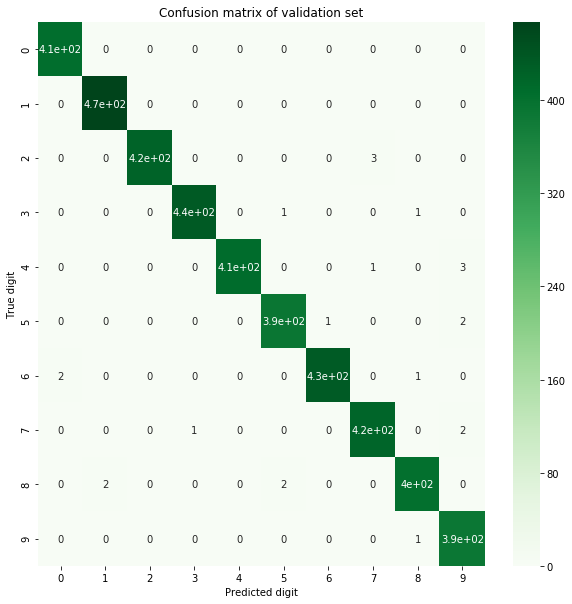

In [78]:
# show confusion matrix
import seaborn as sns
mn = nn_name[0]
nn_graph = nn_class()
sess = nn_graph.load_session_from_file(mn)
y_valid_pred[mn] = nn_graph.forward(sess, x_valid)
sess.close()

cnf_matrix = sklearn.metrics.confusion_matrix(
    one_hot_to_dense(y_valid_pred[mn]), one_hot_to_dense(y_valid)).astype(np.float32)

labels_array = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
fig, ax = plt.subplots(1,figsize=(10,10))
ax = sns.heatmap(cnf_matrix, ax=ax, cmap=plt.cm.Greens, annot=True)
ax.set_xticklabels(labels_array)
ax.set_yticklabels(labels_array)
plt.title('Confusion matrix of validation set')
plt.ylabel('True digit')
plt.xlabel('Predicted digit')
plt.show()

C:\Users\prateek1.gupta\tmp.meta
INFO:tensorflow:Restoring parameters from tmp
final train/valid loss = 0.0146/0.0203, train/valid accuracy = 0.9950/0.9945


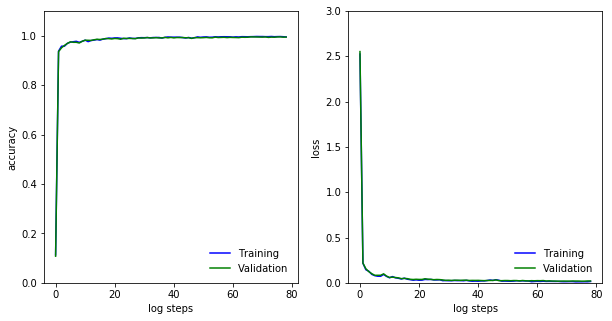

In [79]:
# loss and accuracy curves
mn = nn_name[0]
nn_graph = nn_class()
sess = nn_graph.load_session_from_file(mn)
train_loss[mn], valid_loss[mn] = nn_graph.get_loss(sess)
train_acc[mn], valid_acc[mn] = nn_graph.get_accuracy(sess)
sess.close()

print('final train/valid loss = %.4f/%.4f, train/valid accuracy = %.4f/%.4f'%(
    train_loss[mn][-1], valid_loss[mn][-1], train_acc[mn][-1], valid_acc[mn][-1]))

plt.figure(figsize=(10, 5));
plt.subplot(1,2,1);
plt.plot(np.arange(0,len(train_acc[mn])), train_acc[mn],'-b', label='Training')
plt.plot(np.arange(0,len(valid_acc[mn])), valid_acc[mn],'-g', label='Validation')
plt.legend(loc='lower right', frameon=False)
plt.ylim(ymax = 1.1, ymin = 0.0)
plt.ylabel('accuracy')
plt.xlabel('log steps')

plt.subplot(1,2,2)
plt.plot(np.arange(0,len(train_loss[mn])), train_loss[mn],'-b', label='Training')
plt.plot(np.arange(0,len(valid_loss[mn])), valid_loss[mn],'-g', label='Validation')
plt.legend(loc='lower right', frameon=False)
plt.ylim(ymax = 3.0, ymin = 0.0)
plt.ylabel('loss')
plt.xlabel('log steps')

C:\Users\prateek1.gupta\tmp.meta
INFO:tensorflow:Restoring parameters from tmp
W_conv1: min = -0.390328 max = 0.303926 mean = -0.0118894 std = 0.151783
W_conv2: min = -0.445767 max = 0.373773 mean = -0.0137524 std = 0.104361
W_conv3: min = -0.431724 max = 0.309009 mean = -0.0175114 std = 0.106184


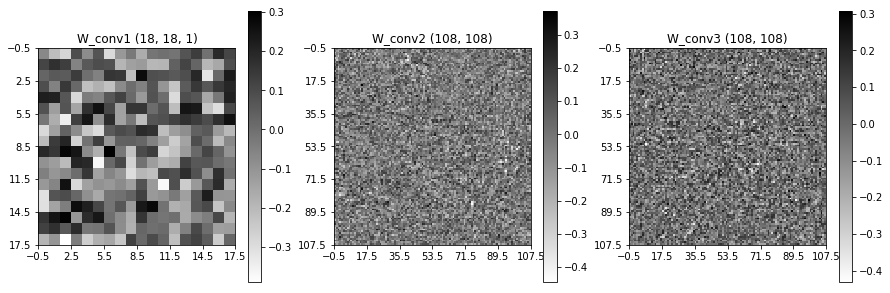

In [80]:
# visualize weights

mn = nn_name[0]
nn_graph = nn_class()
sess = nn_graph.load_session_from_file(mn)
W_conv1, W_conv2, W_conv3, _, _ = nn_graph.get_weights(sess)
sess.close()

print('W_conv1: min = ' + str(np.min(W_conv1)) + ' max = ' + str(np.max(W_conv1))
      + ' mean = ' + str(np.mean(W_conv1)) + ' std = ' + str(np.std(W_conv1)))
print('W_conv2: min = ' + str(np.min(W_conv2)) + ' max = ' + str(np.max(W_conv2))
      + ' mean = ' + str(np.mean(W_conv2)) + ' std = ' + str(np.std(W_conv2)))
print('W_conv3: min = ' + str(np.min(W_conv3)) + ' max = ' + str(np.max(W_conv3))
      + ' mean = ' + str(np.mean(W_conv3)) + ' std = ' + str(np.std(W_conv3)))

s_f_conv1 = nn_graph.s_f_conv1
s_f_conv2 = nn_graph.s_f_conv2
s_f_conv3 = nn_graph.s_f_conv3

W_conv1 = np.reshape(W_conv1,(s_f_conv1,s_f_conv1,1,6,6))
W_conv1 = np.transpose(W_conv1,(3,0,4,1,2))
W_conv1 = np.reshape(W_conv1,(s_f_conv1*6,s_f_conv1*6,1))

W_conv2 = np.reshape(W_conv2,(s_f_conv2,s_f_conv2,6,6,36))
W_conv2 = np.transpose(W_conv2,(2,0,3,1,4))
W_conv2 = np.reshape(W_conv2,(6*s_f_conv2,6*s_f_conv2,6,6))
W_conv2 = np.transpose(W_conv2,(2,0,3,1))
W_conv2 = np.reshape(W_conv2,(6*6*s_f_conv2,6*6*s_f_conv2))

W_conv3 = np.reshape(W_conv3,(s_f_conv3,s_f_conv3,6,6,36))
W_conv3 = np.transpose(W_conv3,(2,0,3,1,4))
W_conv3 = np.reshape(W_conv3,(6*s_f_conv3,6*s_f_conv3,6,6))
W_conv3 = np.transpose(W_conv3,(2,0,3,1))
W_conv3 = np.reshape(W_conv3,(6*6*s_f_conv3,6*6*s_f_conv3))

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.gca().set_xticks(np.arange(-0.5, s_f_conv1*6, s_f_conv1), minor = False);
plt.gca().set_yticks(np.arange(-0.5, s_f_conv1*6, s_f_conv1), minor = False);
plt.grid(which = 'minor', color='b', linestyle='-', linewidth=1)
plt.title('W_conv1 ' + str(W_conv1.shape))
plt.colorbar(plt.imshow(W_conv1[:,:,0], cmap=cm.binary));

plt.subplot(1,3,2)
plt.gca().set_xticks(np.arange(-0.5, 6*6*s_f_conv2, 6*s_f_conv2), minor = False);
plt.gca().set_yticks(np.arange(-0.5, 6*6*s_f_conv2, 6*s_f_conv2), minor = False);
plt.grid(which = 'minor', color='b', linestyle='-', linewidth=1)
plt.title('W_conv2 ' + str(W_conv2.shape))
plt.colorbar(plt.imshow(W_conv2[:,:], cmap=cm.binary));

plt.subplot(1,3,3)
plt.gca().set_xticks(np.arange(-0.5, 6*6*s_f_conv3, 6*s_f_conv3), minor = False);
plt.gca().set_yticks(np.arange(-0.5, 6*6*s_f_conv3, 6*s_f_conv3), minor = False);
plt.grid(which = 'minor', color='b', linestyle='-', linewidth=1)
plt.title('W_conv3 ' + str(W_conv3.shape))
plt.colorbar(plt.imshow(W_conv3[:,:], cmap=cm.binary))

C:\Users\prateek1.gupta\tmp.meta
INFO:tensorflow:Restoring parameters from tmp
h_fc2 =  [[ -7.78 -16.29  -2.37   1.07 -15.23  -4.83  -5.72 -18.82  21.03  -2.44]]


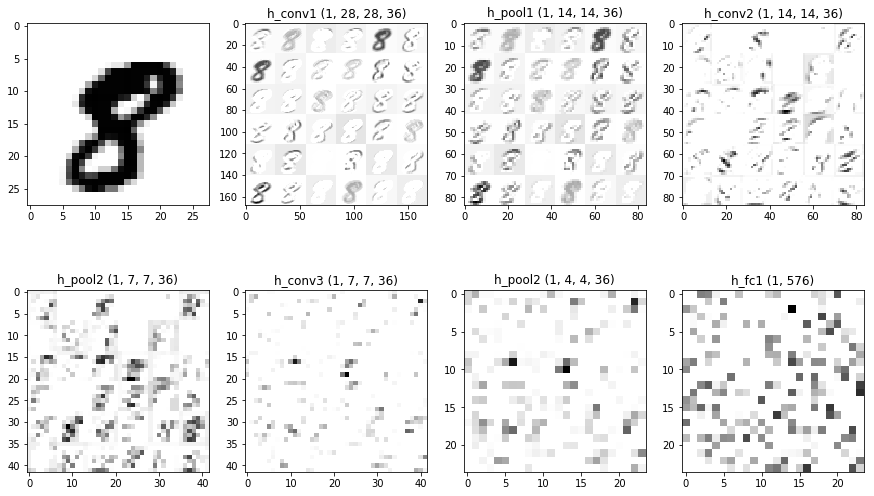

In [81]:
# visualize activations

img_no = 10;
mn = nn_name[0]
nn_graph = nn_class()
sess = nn_graph.load_session_from_file(mn)
(h_conv1, h_pool1, h_conv2, h_pool2,h_conv3, h_pool3, h_fc1,
 h_fc2) = nn_graph.get_activations(sess, x_train_valid[img_no:img_no+1])
sess.close()
    
# original image
plt.figure(figsize=(15,9))
plt.subplot(2,4,1)
plt.imshow(x_train_valid[img_no].reshape(28,28),cmap=cm.binary);

# 1. convolution
plt.subplot(2,4,2)
plt.title('h_conv1 ' + str(h_conv1.shape))
h_conv1 = np.reshape(h_conv1,(-1,28,28,6,6))
h_conv1 = np.transpose(h_conv1,(0,3,1,4,2))
h_conv1 = np.reshape(h_conv1,(-1,6*28,6*28))
plt.imshow(h_conv1[0], cmap=cm.binary);

# 1. max pooling
plt.subplot(2,4,3)
plt.title('h_pool1 ' + str(h_pool1.shape))
h_pool1 = np.reshape(h_pool1,(-1,14,14,6,6))
h_pool1 = np.transpose(h_pool1,(0,3,1,4,2))
h_pool1 = np.reshape(h_pool1,(-1,6*14,6*14))
plt.imshow(h_pool1[0], cmap=cm.binary);

# 2. convolution
plt.subplot(2,4,4)
plt.title('h_conv2 ' + str(h_conv2.shape))
h_conv2 = np.reshape(h_conv2,(-1,14,14,6,6))
h_conv2 = np.transpose(h_conv2,(0,3,1,4,2))
h_conv2 = np.reshape(h_conv2,(-1,6*14,6*14))
plt.imshow(h_conv2[0], cmap=cm.binary);

# 2. max pooling
plt.subplot(2,4,5)
plt.title('h_pool2 ' + str(h_pool2.shape))
h_pool2 = np.reshape(h_pool2,(-1,7,7,6,6))
h_pool2 = np.transpose(h_pool2,(0,3,1,4,2))
h_pool2 = np.reshape(h_pool2,(-1,6*7,6*7))
plt.imshow(h_pool2[0], cmap=cm.binary);

# 3. convolution
plt.subplot(2,4,6)
plt.title('h_conv3 ' + str(h_conv3.shape))
h_conv3 = np.reshape(h_conv3,(-1,7,7,6,6))
h_conv3 = np.transpose(h_conv3,(0,3,1,4,2))
h_conv3 = np.reshape(h_conv3,(-1,6*7,6*7))
plt.imshow(h_conv3[0], cmap=cm.binary);

# 3. max pooling
plt.subplot(2,4,7)
plt.title('h_pool2 ' + str(h_pool3.shape))
h_pool3 = np.reshape(h_pool3,(-1,4,4,6,6))
h_pool3 = np.transpose(h_pool3,(0,3,1,4,2))
h_pool3 = np.reshape(h_pool3,(-1,6*4,6*4))
plt.imshow(h_pool3[0], cmap=cm.binary);

# 4. FC layer
plt.subplot(2,4,8)
plt.title('h_fc1 ' + str(h_fc1.shape))
h_fc1 = np.reshape(h_fc1,(-1,24,24))
plt.imshow(h_fc1[0], cmap=cm.binary);

# 5. FC layer
np.set_printoptions(precision=2)
print('h_fc2 = ', h_fc2)

C:\Users\prateek1.gupta\tmp.meta
INFO:tensorflow:Restoring parameters from tmp
# false predictions:  23 out of 4200


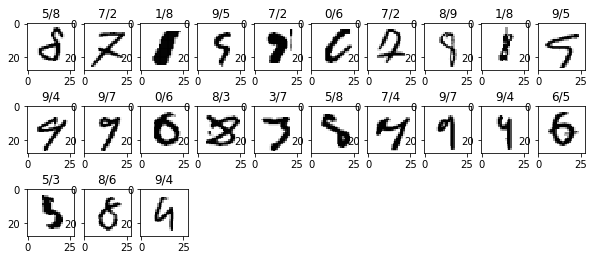

In [82]:
# show misclassified images

mn = nn_name[0]
nn_graph = nn_class()
sess = nn_graph.load_session_from_file(mn)
y_valid_pred[mn] = nn_graph.forward(sess, x_valid)
sess.close()

y_valid_pred_label = one_hot_to_dense(y_valid_pred[mn])
y_valid_label = one_hot_to_dense(y_valid)
y_val_false_index = []

for i in range(y_valid_label.shape[0]):
    if y_valid_pred_label[i] != y_valid_label[i]:
        y_val_false_index.append(i)

print('# false predictions: ', len(y_val_false_index),'out of', len(y_valid))

plt.figure(figsize=(10,15))
for j in range(0,5):
    for i in range(0,10):
        if j*10+i<len(y_val_false_index):
            plt.subplot(10,10,j*10+i+1)
            plt.title('%d/%d'%(y_valid_label[y_val_false_index[j*10+i]],
                               y_valid_pred_label[y_val_false_index[j*10+i]]))
            plt.imshow(x_valid[y_val_false_index[j*10+i]].reshape(28,28),cmap=cm.binary)

In [83]:
# read test data from CSV file 
if os.path.isfile('E:/pg/bpb/BPB-Publications/Datasets/deep/digits/test.csv'):
    test_df = pd.read_csv('E:/pg/bpb/BPB-Publications/Datasets/deep/digits/test.csv') # on kaggle 
    print('test.csv loaded: test_df{0}'.format(test_df.shape))
elif os.path.isfile('E:/pg/bpb/BPB-Publications/Datasets/deep/digits/test.csv'):
    test_df = pd.read_csv('E:/pg/bpb/BPB-Publications/Datasets/deep/digits/test.csv') # on local environment
    print('test.csv loaded: test_df{0}'.format(test_df.shape))
else:
    print('Error: test.csv not found')
    
# transforma and normalize test data
x_test = test_df.iloc[:,0:].values.reshape(-1,28,28,1) # (28000,28,28,1) array
x_test = x_test.astype(np.float)
x_test = normalize_data(x_test)
print('x_test.shape = ', x_test.shape)

# for saving results
y_test_pred = {}
y_test_pred_labels = {}

test.csv loaded: test_df(28000, 784)
x_test.shape =  (28000, 28, 28, 1)


In [84]:
# Stacking of neural networks

if False:
    
    take_models = ['nn0','nn1','nn2','nn3','nn4','nn5','nn6','nn7','nn8','nn9']

    # cross validations
    # choose the same seed as was done for training the neural nets
    kfold = sklearn.model_selection.KFold(len(take_models), shuffle=True, random_state = 123)

    # train and test data for meta model
    x_train_meta = np.array([]).reshape(-1,10)
    y_train_meta = np.array([]).reshape(-1,10)
    x_test_meta = np.zeros((x_test.shape[0], 10))

    print('Out-of-folds predictions:')

    # make out-of-folds predictions from base models
    for i,(train_index, valid_index) in enumerate(kfold.split(x_train_valid)):

        # training and validation data
        x_train = x_train_valid[train_index]
        y_train = y_train_valid[train_index]
        x_valid = x_train_valid[valid_index]
        y_valid = y_train_valid[valid_index]

        # load neural network and make predictions
        mn = take_models[i] 
        nn_graph = nn_class()
        sess = nn_graph.load_session_from_file(mn)
        y_train_pred[mn] = nn_graph.forward(sess, x_train[:len(x_valid)])
        y_valid_pred[mn] = nn_graph.forward(sess, x_valid)
        y_test_pred[mn] = nn_graph.forward(sess, x_test)
        sess.close()

        # collect train and test data for meta model 
        x_train_meta = np.concatenate([x_train_meta, y_valid_pred[mn]])
        y_train_meta = np.concatenate([y_train_meta, y_valid]) 
        x_test_meta += y_test_pred[mn]

        print(take_models[i],': train/valid accuracy = %.4f/%.4f'%(
            accuracy_from_one_hot_labels(y_train_pred[mn], y_train[:len(x_valid)]),
            accuracy_from_one_hot_labels(y_valid_pred[mn], y_valid)))

        if False:
            break;

    # take average of test predictions
    x_test_meta = x_test_meta/(i+1)
    y_test_pred['stacked_models'] = x_test_meta

    print('')
    print('Stacked models: valid accuracy = %.4f'%accuracy_from_one_hot_labels(x_train_meta,
                                                                               y_train_meta))

In [85]:
# use meta model

if False:
    
    logreg = sklearn.linear_model.LogisticRegression(verbose=0, solver='lbfgs',
                                                     multi_class='multinomial')
    
    # choose meta model
    take_meta_model = 'logreg'

    # train meta model
    model = sklearn.base.clone(base_models[take_meta_model]) 
    model.fit(x_train_meta, one_hot_to_dense(y_train_meta))
    
    y_train_pred['meta_model'] = model.predict_proba(x_train_meta)
    y_test_pred['meta_model'] = model.predict_proba(x_test_meta)

    print('Meta model: train accuracy = %.4f'%accuracy_from_one_hot_labels(x_train_meta, 
                                                           y_train_pred['meta_model']))

In [86]:
# choose one single model for test prediction

if True:
    
    mn = nn_name[0] # choose saved model
    nn_graph = nn_class() # create instance
    sess = nn_graph.load_session_from_file(mn) # receive session 
    y_test_pred = {}
    y_test_pred_labels = {}

    # split evaluation of test predictions into batches
    kfold = sklearn.model_selection.KFold(40, shuffle=False) 
    for i,(train_index, valid_index) in enumerate(kfold.split(x_test)):
        if i==0:
            y_test_pred[mn] = nn_graph.forward(sess, x_test[valid_index])
        else: 
            y_test_pred[mn] = np.concatenate([y_test_pred[mn],
                                              nn_graph.forward(sess, x_test[valid_index])])

    sess.close()

C:\Users\prateek1.gupta\tmp.meta
INFO:tensorflow:Restoring parameters from tmp


In [87]:
# choose the test predictions and submit the results
mn = nn_name[0]
y_test_pred_labels[mn] = one_hot_to_dense(y_test_pred[mn])

print(mn+': y_test_pred_labels[mn].shape = ', y_test_pred_labels[mn].shape)
unique, counts = np.unique(y_test_pred_labels[mn], return_counts=True)
print(dict(zip(unique, counts)))

# save predictions
np.savetxt('E:/pg/bpb/BPB-Publications/Datasets/deep/digits/submission_tensor.csv', 
           np.c_[range(1,len(x_test)+1), y_test_pred_labels[mn]], 
           delimiter=',', 
           header = 'ImageId,Label', 
           comments = '', 
           fmt='%d')

print('E:/pg/bpb/BPB-Publications/Datasets/deep/digits/submission_tensor.csv completed')

tmp: y_test_pred_labels[mn].shape =  (28000,)
{0: 2765, 1: 3191, 2: 2817, 3: 2805, 4: 2764, 5: 2510, 6: 2755, 7: 2887, 8: 2747, 9: 2759}
E:/pg/bpb/BPB-Publications/Datasets/deep/digits/submission_tensor.csv completed
